In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/ML/Iris.csv')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
sns.set_style('whitegrid')

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [35]:
X = df.iloc[:,2:4]

In [36]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [37]:
y = df.iloc[:, 4]

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
knn.fit( X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


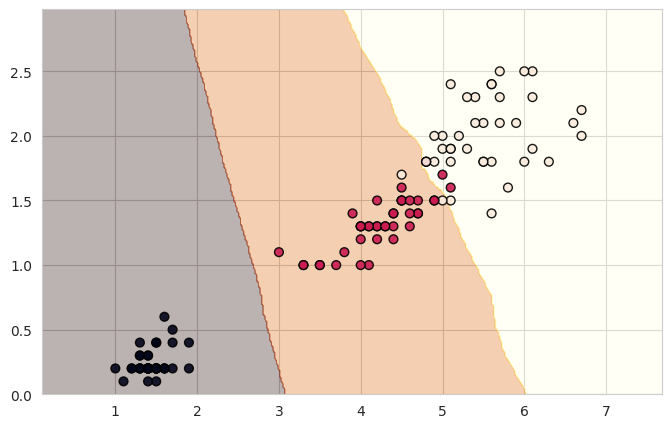

In [41]:
# Assuming 'X_train' is a pandas DataFrame or similar 2D structure
# and 'y_train' is the corresponding 1D target array/series,
# and 'knn' is a fitted k-NN classifier object (e.g., from scikit-learn).

# Prepare data for meshgrid and plotting
Xv = X_train.values.reshape(-1)
h = 0.02

# Determine plot limits based on training data
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1

# Create a meshgrid (grid of points)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for every point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the figure and axes
fig = plt.figure(figsize=(8, 5))

# Plot the decision boundary using contourf
ax = plt.contourf(xx, yy, Z, cmap='afmhot', alpha=0.3)

# Plot the training points
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40,
            alpha=0.9, edgecolors='k');

In [42]:
knn

KNeighborsClassifier(n_neighbors=20)